In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , roc_curve, auc , classification_report, confusion_matrix , precision_recall_curve 


In [3]:
data = pd.read_csv("dataset.csv")
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
X = data.drop("Recurred" , axis=1)
y = data["Recurred"].map({"No" : 0 , "Yes" : 1})

In [6]:
numeric_features = ["Age"]
binary_features = ["Gender" , "Smoking" , "Hx Smoking" , "Hx Radiothreapy" , "Focality" , "M" ]
categorical_features = ["Thyroid Function" , "Physical Examination" ,"Adenopathy" , "Pathology" , "Risk" , "T" , "N" , "Stage" , "Response"]

In [7]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

binary_transformer = Pipeline(steps=[("binary", OrdinalEncoder())])

categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num" , numeric_transformer , numeric_features),
        ("bin", binary_transformer , binary_features), 
        ("cat" , categorical_transformer , categorical_features)
    ],
)

In [9]:
clf = Pipeline(
    steps=[
        ("preprocessor" , preprocessor),
        # ("classifier" , SVC(kernel="rbf" ,  probability=True))
        ("classifier" , SVC(kernel="poly", degree=2, coef0=1, C=5 ,  probability=True))
    ]
)

In [10]:
X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size=0.2 , random_state=42
)

In [11]:
clf.fit(X_train , y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
print("Train accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))

Train accuracy: 0.9967320261437909
Test accuracy: 0.974025974025974


In [13]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[57  1]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



In [14]:
scores = cross_val_score(clf, X, y, cv=5)
print("CV scores:", scores)
print("Mean CV accuracy:", scores.mean())

CV scores: [0.96103896 0.92207792 0.93506494 0.86842105 0.77631579]
Mean CV accuracy: 0.8925837320574163


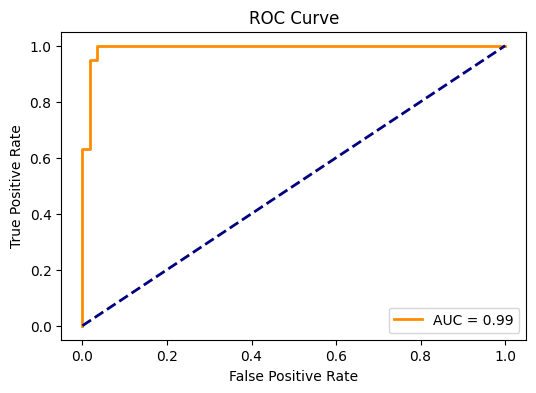

In [15]:
y_prob = clf.predict_proba(X_test)[:, 1]  

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

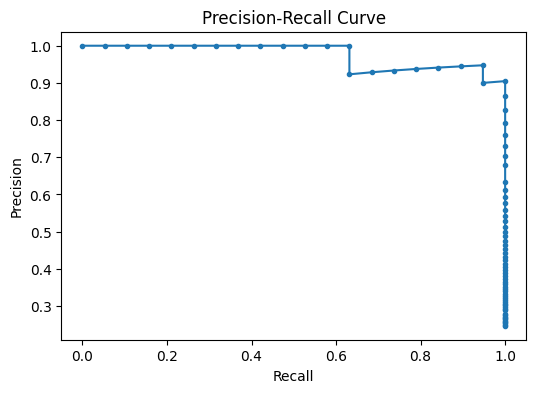

In [16]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

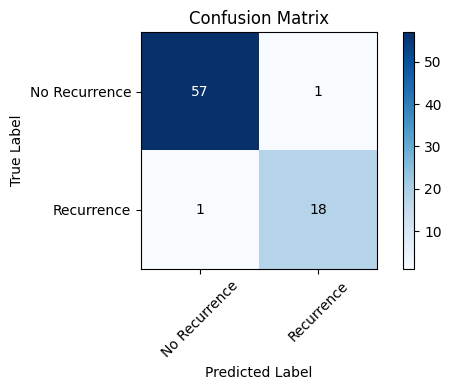

In [17]:
# Predict
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ["No Recurrence", "Recurrence"]

plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Annotate the cells
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], "d"),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

In [18]:
import joblib

In [19]:
joblib.dump(clf , "thyroid_cancer_detection_svc.pkl")

['thyroid_cancer_detection_svc.pkl']